## Simple Linear Regression analysis 
### On " Housing Details"

### Aim:
- To find the relation of housing values based on the income generation of the people.

Outline:                
1. Explore the dataset using pandas framework.
2. Visualize the dataset using matplotlib,seabon library.
3. Perform simple linear regression.
4. Build model using 'train-test-split method'.

About dataset:
Dataset 'housing details' is refere from the kaggle dataset.

reference link: https://www.kaggle.com/datasets/camnugent/california-housing-prices                   

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices but, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.                                                           

Dataset contains:
1. income: income for households within a block of houses (measured in tens of thousands of US Dollar)
2. house_value: house value for households within a block (measured in US Dollar)
3. oceanProximity: Location of the house w.r.t ocean/sea

#### Import library

In [3]:
import numpy as np
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

#### Read the file

In [4]:
df=pd.read_csv('housing details.csv')
df

,income,house_value,ocean_proximity
0,8.3252,452600,NEAR BAY
1,8.3014,358500,NEAR BAY
2,7.2574,352100,NEAR BAY
3,5.6431,341300,NEAR BAY
4,3.8462,342200,NEAR BAY
...,...,...,...
20635,1.5603,78100,INLAND
20636,2.5568,77100,INLAND
20637,1.7000,92300,INLAND
20638,1.8672,84700,INLAND


#### Find shape  and size of the dataset

In [199]:
df.shape

(20640, 3)

In [200]:
df.size

61920

#### Show the datatypes present in the data

In [204]:
df.dtypes

income             float64
house_value          int64
ocean_proximity     object
dtype: object

#### Columns present in data as

In [206]:
df.columns

Index(['income', 'house_value', 'ocean_proximity'], dtype='object')

Three columns 'income', 'house_value', 'ocean_proximity' are present in the given dataset.

#### Gather information about the dataset.

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   income           20640 non-null  float64
 1   house_value      20640 non-null  int64  
 2   ocean_proximity  20640 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 483.9+ KB


As we can see, the dataset is full, no pass (non-null), so there is no need to fill the gaps. The dataset contains 1 integer (int64) and 1 float (float64(1)) and one (object) features.

#### lets check for the null values

In [148]:
df.isnull().sum()

income             0
house_value        0
ocean_proximity    0
dtype: int64

There is no null value present in dataset.No need to make corrections to dataset.

#### Describe the data

In [219]:
df.describe()

,income,house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


#### Display the some rows of the dataset.

In [201]:
df.head(10)

,income,house_value,ocean_proximity
0,8.3252,452600,NEAR BAY
1,8.3014,358500,NEAR BAY
2,7.2574,352100,NEAR BAY
3,5.6431,341300,NEAR BAY
4,3.8462,342200,NEAR BAY
5,4.0368,269700,NEAR BAY
6,3.6591,299200,NEAR BAY
7,3.1200,241400,NEAR BAY
8,2.0804,226700,NEAR BAY
9,3.6912,261100,NEAR BAY


In [202]:
df.tail(10)

,income,house_value,ocean_proximity
20630,3.5673,112000,INLAND
20631,3.5179,107200,INLAND
20632,3.1250,115600,INLAND
20633,2.5495,98300,INLAND
20634,3.7125,116800,INLAND
20635,1.5603,78100,INLAND
20636,2.5568,77100,INLAND
20637,1.7000,92300,INLAND
20638,1.8672,84700,INLAND
20639,2.3886,89400,INLAND


#### remove unnessesary data

In [3]:
df.drop(['ocean_proximity'],axis=1,inplace=True)

In [4]:
df

,income,house_value
0,8.3252,452600
1,8.3014,358500
2,7.2574,352100
3,5.6431,341300
4,3.8462,342200
...,...,...
20635,1.5603,78100
20636,2.5568,77100
20637,1.7000,92300
20638,1.8672,84700


#### sorting of the data with respect to income

In [5]:
df.sort_values(by = ["income"], ascending =True).head(10)

,income,house_value
4861,0.4999,500001
7125,0.4999,162500
6688,0.4999,500001
19800,0.4999,56700
6343,0.4999,112500
20091,0.4999,162500
13999,0.4999,55000
5213,0.4999,90600
3258,0.4999,73500
19523,0.4999,82500


### Visualization

After exploring data start the visualization of dataset.                                              
Find the relationship between the columns present in the data.

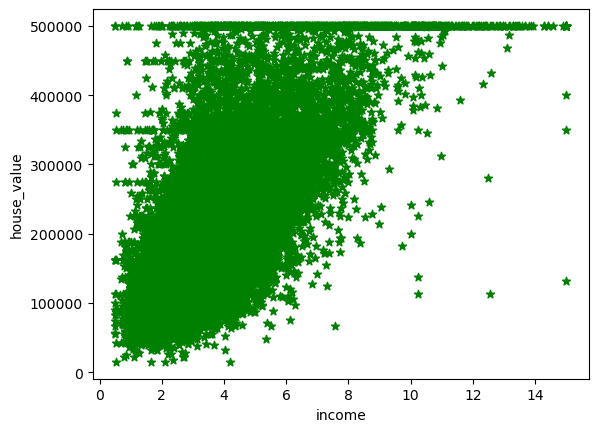

In [5]:
plt.scatter(x='income',y='house_value',data=df,color='green',marker='*')
plt.xlabel('income')
plt.ylabel('house_value')
plt.show()

The graph shows the value of the house is depend on the income of the household.

In [209]:
df.corr()

,income,house_value
income,1.000000,0.688075
house_value,0.688075,1.000000


#### Let's check for the Outliers
Outliers are the abnormal values in a dataset that don't go with the regular distribution and have the potential to significantly distort any regression model.

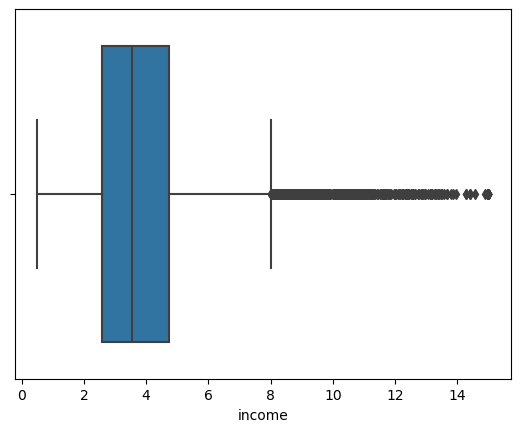

In [211]:
sns.boxplot('income',data=df)
plt.show()

After looking at this graph, it can be said that 'income' contains a good number of outliers. As outliers affects regression model, let's see what accuracy we get.

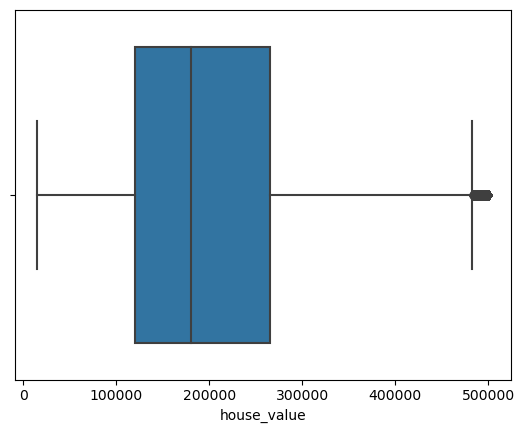

In [212]:
sns.boxplot('house_value',data=df)
plt.show()

Values of house contains less no of outliers compare to income.

### Simple Linear Regression
- Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line. 
- Both variables should be quantitative.

Equation of linear regression
y=c+m1x1+m2x2+...+mnxn
 
y is the response                                                                                     
c is the intercept                                                                                    
m1 is the coefficient for the first feature                                                           
mn is the coefficient for the nth feature                                                                                                                                                              
In our case:                                                                                          
y=c+m1×income

Use the scikit-learn library for the linear regression.

In [156]:
from sklearn import linear_model

In [157]:
model=linear_model.LinearRegression()
model

LinearRegression()

#### prepare x and y
The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
However, X can be a dataframe as Pandas is built over NumPy.

In [158]:
x=df[['income']]
x

,income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [159]:
y=df['house_value']
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: house_value, Length: 20640, dtype: int64

#### Fit the linear model.

In [160]:
model.fit(x,y)

LinearRegression()

#### Predict using the linear mode.

In [161]:
model.predict([[5.6431]])

array([280932.44713449])

In [162]:
model.predict([[1.7000]])

array([116135.12034649])

#### Find the estimated coefficient of model

In [163]:
model.coef_

array([41793.8492019])

#### Find the intercept of the model

In [164]:
model.intercept_

45085.576703268074

#### cross checking of the regession model

In [165]:
41793.8492019*5.6431+45085.576703268074

280932.4471345099

Here, model using scikit-learn library gives the same value we calculated by mannually.

#### plot the visualization of actual values and predicted values

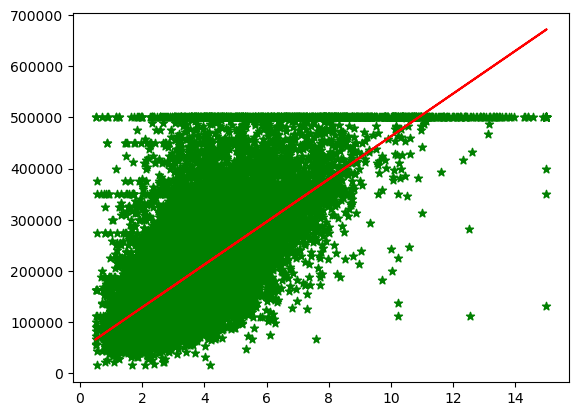

In [166]:
plt.scatter(df.income,df.house_value,color='green',marker='*')
plt.plot(df.income,model.predict(df[['income']]),color='red')
plt.show()

Graph shows predicted values and actual values not much differ to each other.

#### Now, check for the accuracy

In [167]:
model.score(x,y)*100

47.3447491807199

#### accuracy of given model is 47.34% which can be consider as low.

 Simple Linear Regression is done. Now build model of regression by using Train-Test-Split Method

### Train-Test-Split Method
Train Dataset: Used to fit the machine learning model.                                                
Test Dataset: Used to evaluate the fit machine learning model.

#### prepare x and y
By using iloc function to reshape and draw the values of x and y.                                         
iloc is used to select rows and columns from a Pandas DataFrame or a Series using integer-based indexing

In [168]:
x=df.iloc[:,:-1].values
x

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [169]:
y=df.iloc[:,1].values
y

array([452600, 358500, 352100, ...,  92300,  84700,  89400], dtype=int64)

In [170]:
from sklearn.model_selection import train_test_split

#### Apply train, test to x and y 
Here we are using training set with the size of 0.80 (80 percent) means that the remainder percentage 0.2 (20 percent) is assigned to the test set.

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Print the shape of train and test.

In [172]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 1)
(4128, 1)
(16512,)
(4128,)


#### Start applying regression model to train test data.

In [173]:
from sklearn import linear_model

In [174]:
model= linear_model.LinearRegression()
model

LinearRegression()

In [175]:
model.fit(x_train,y_train)

LinearRegression()

#### Predict the values.

In [176]:
y_predict=model.predict(x_test)
y_predict

array([111386.84184027, 100962.42612566, 201959.63411473, ...,
       146965.73529884, 163608.95479041, 135686.85927976])

In [177]:
y_test

array([ 51900, 108000, 172600, ...,  88900, 109500, 259100], dtype=int64)

#### Data frame after train test is as

In [178]:
new_df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
new_df

,Actual,Predicted
0,51900,111386.841840
1,108000,100962.426126
2,172600,201959.634115
3,157200,150900.420798
4,500001,378132.676501
...,...,...
4123,259200,332125.199229
4124,129700,176951.039837
4125,88900,146965.735299
4126,109500,163608.954790


In [179]:
x_pred=model.predict(x_train)
x_pred

array([147378.37710442, 169952.80153877, 165042.78086232, ...,
       338890.0239813 , 207169.75792251, 106439.3082724 ])

#### Visualize the train and predicted data

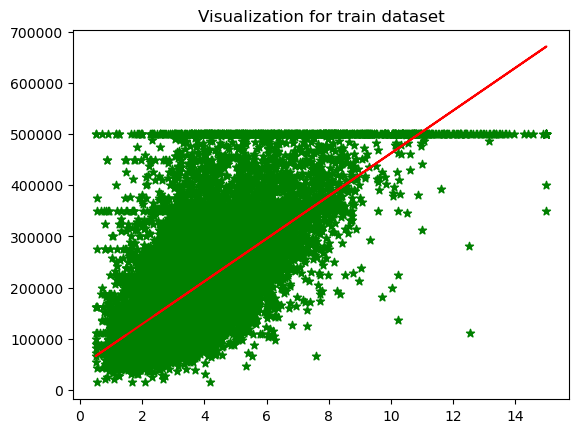

In [181]:
plt.scatter(x_train,y_train,color='green',marker='*')
plt.plot(x_train,x_pred,color='red')
plt.title("Visualization for train dataset")
plt.show()

Above graph shows that the train and predicted data are not much differ from each other.

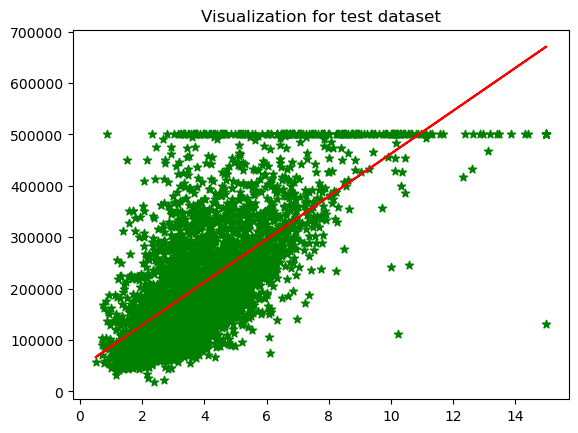

In [182]:
plt.scatter(x_test,y_test,color="green",marker="*")
plt.plot(x_train,x_pred,color="red")
plt.title("Visualization for test dataset")
plt.show()

Above graph shows that the train and predicted data are quite differ from each other.

#### Find mean squared error 
The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss.

In [185]:
from sklearn.metrics import mean_squared_error

In [187]:
mean_squared_error(y_test, y_predict)

6873199988.270266

In [191]:
np.sqrt(mean_squared_error(y_test, y_predict))

82904.76456917459

#### Find mean absolute error
It is the magnitude of difference between the prediction of an observation and the true value of that observation.

In [189]:
from sklearn.metrics import mean_absolute_error

In [190]:
mean_absolute_error(y_test, y_predict)

62076.52601199606

#### Find R squared score
It is proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [192]:
from sklearn.metrics import r2_score

In [193]:
r2_score(y_test, y_predict)

0.4856941427284819

#### Find accuracy of model

In [196]:
accuracy=r2_score(y_test,y_predict)*100
accuracy

48.569414272848185

In [217]:
model.score(x_train,y_train)

0.47035141341950915

In [218]:
model.score(x_test,y_test)

0.4856941427284819

##### The accuracy of model is 48% it is consider as minimum relation between the income and house values.

### Final conclusion
- By using both models Simple Linear Regression and Train-Test-Split method, the model shows low accuracy as(47.34%) and (48.56%) respectively.
- After looking to the accuracy we can say that data may be of poor quality or insufficent.
- The model selection may be inappropriate.